# **#TechSeriesML Challenge**


*TechSeriesML : From Data, By Data, For Data*

<hr>

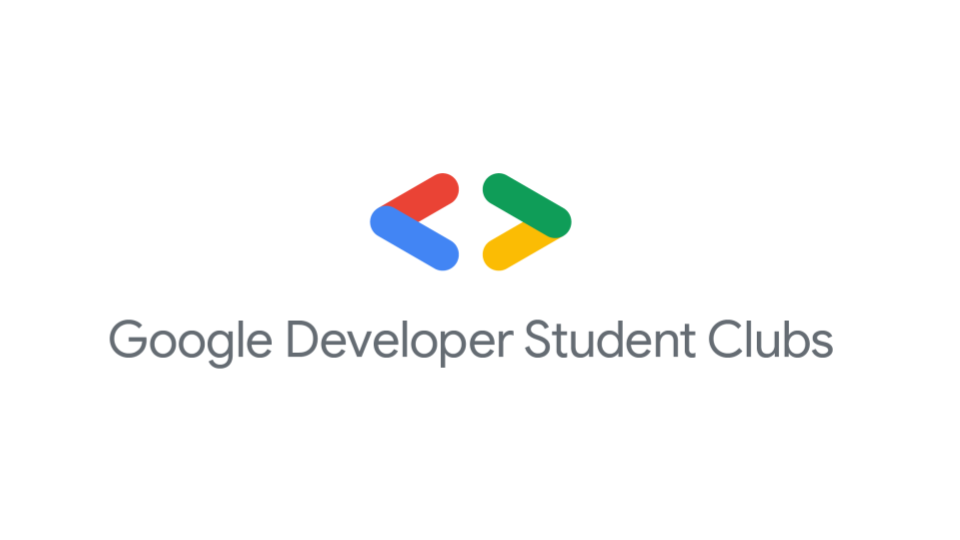

**Challenge Description**

Welcome to the #TechSeriesML challenge! In this challenge, participants will dive into the dataset containing information about various diamonds, exploring their characteristics, and predicting their prices.


**Challenge Tasks :**

1. Provide insights through Exploratory Data Analysis.
2. Build Machine Learning model to predict diamond prices.

## **Dataset**

https://raw.githubusercontent.com/damahindra/TechSeriesMLHOP/main/Challenge!/DiamondsDataset.csv

**Dataset Description**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

> ***Price*** : price in US dollars (\$326--\$18,823)

> ***Carat*** : weight of the diamond (0.2--5.01)

> ***Cut*** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

> ***Color*** : diamond colour, from J (worst) to D (best)

> ***Clarity*** : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

> ***X*** : length in mm (0--10.74)

> ***Y*** : width in mm (0--58.9)

> ***Z*** : depth in mm (0--31.8)

> ***Depth*** : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

> ***Table*** : width of top of diamond relative to widest point (43--95)

## **Evaluation Criteria**

The evaluation criteria for this challenge includes :
- Data Preprocessing : 30%
- Data Visualization and Storytelling : 40%
- Modelling : 30%

## **Solution**

Provide your solution on cells below

## Importing Libraries

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
np.random.seed(10) # set numpy's seed
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset and Analysis Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/damahindra/TechSeriesMLHOP/main/Challenge!/DiamondsDataset.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# ukuran data
data.shape

(53940, 11)

In [ ]:
# info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# describe data
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# banyak data yg NaN -> tidak ada data yang NaN
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# banyak data yg duplikat -> tidak ada data yang duplicated
data.duplicated().sum()

0

In [ ]:
# data['cut'].unique() # array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)
# data['cut'].nunique() # 5
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
# data['color'].unique() # array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)
# data['color'].nunique() # 7
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
# data['clarity'].unique() # array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)
# data['clarity'].nunique() # 8
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## Data Visualization

In [ ]:
from sklearn.model_selection import train_test_split

data = data.drop('Unnamed: 0', axis=1)
train, test = train_test_split(data, test_size=0.2, random_state=2023)
TARGET = 'price'

# test_set = data.tail(10) # get last 10 rows of data
# test = test_set.drop(TARGET, axis=1) # independent variables
# y_true = test_set[TARGET] # dependent variable (TARGET)

print("Banyak data: ", len(data))
print("Banyak data train: ", len(train))
print("Banyak data test: ", len(test))

Banyak data:  53940
Banyak data train:  43152
Banyak data test:  10788


Skewness of this feature is 1.6161226101587363



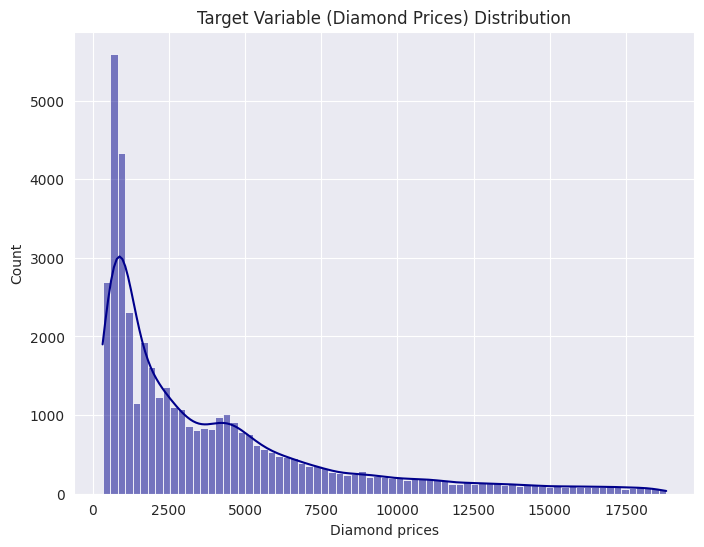

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=train, x=TARGET, kde=True, color='darkblue')
plt.title('Target Variable (Diamond Prices) Distribution')
plt.xlabel('Diamond prices')

# calculate skewness
print(f'Skewness of this feature is {train[TARGET].skew()}\n')

In [ ]:
train.groupby(['carat'])[TARGET].mean().round(1)

carat
0.20      364.6
0.21      378.6
0.22      388.2
0.23      488.5
0.24      505.2
         ...   
4.00    15984.0
4.01    15223.0
4.13    17329.0
4.50    18531.0
5.01    18018.0
Name: price, Length: 271, dtype: float64

Text(0.5, 0, 'Carat')

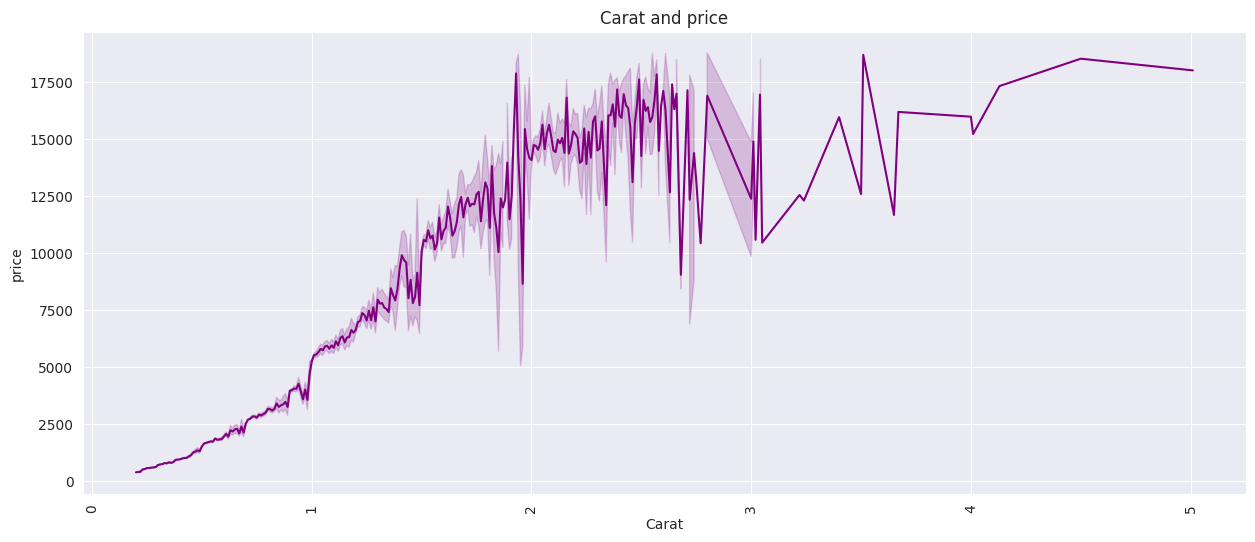

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='carat', y=TARGET, color='purple')
plt.xticks(rotation=90)
plt.title('Carat and price')
plt.xlabel('Carat')

In [ ]:
train.corr() # to see feature correlations

,carat,depth,table,price,x,y,z
carat,1.000000,0.031232,0.182391,0.921236,0.974849,0.945752,0.968197
depth,0.031232,1.000000,-0.291369,-0.008517,-0.022471,-0.026798,0.098313
table,0.182391,-0.291369,1.000000,0.128071,0.195641,0.182741,0.154914
price,0.921236,-0.008517,0.128071,1.000000,0.884252,0.860026,0.874490
x,0.974849,-0.022471,0.195641,0.884252,1.000000,0.969397,0.986002
y,0.945752,-0.026798,0.182741,0.860026,0.969397,1.000000,0.962858
z,0.968197,0.098313,0.154914,0.874490,0.986002,0.962858,1.000000


Text(0.5, 1.0, 'Feature Correlations')

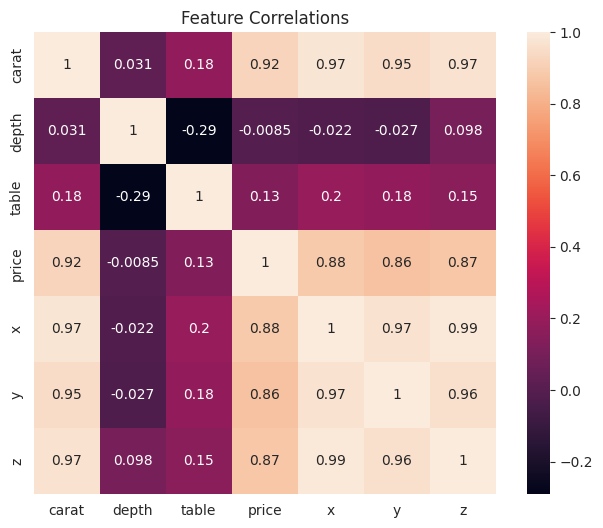

In [ ]:
# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=train.corr(), annot=True, square=True)
plt.title('Feature Correlations')

In [ ]:
# see the average ratings by product
train.groupby('cut')['price'].mean().sort_values()

cut
Ideal        3456.953922
Good         3952.697692
Very Good    3986.049431
Fair         4416.208783
Premium      4585.866382
Name: price, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ideal'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Very Good'),
  Text(3, 0, 'Fair'),
  Text(4, 0, 'Premium')])

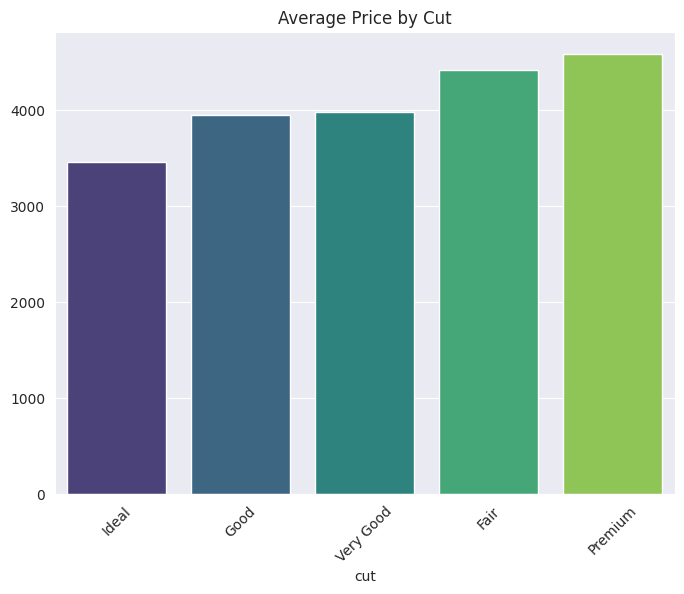

In [ ]:
# plot barplot

# products
products = ['Ideal', 'Good', 'Very Good', 'Fair', 'Premium']

plt.figure(figsize=(8,6))
sns.barplot(x=products, y=train.groupby('cut')['price'].mean().sort_values().to_list(), palette='viridis')
plt.title('Average Price by Cut')
plt.xlabel('cut')
plt.xticks(rotation=45)

In [ ]:
# see the average ratings by product
train.groupby('color')['price'].mean().sort_values()

color
E    3089.933444
D    3190.721454
F    3725.759848
G    4008.405647
H    4484.510459
I    5071.690261
J    5314.631439
Name: price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'D'),
  Text(2, 0, 'F'),
  Text(3, 0, 'G'),
  Text(4, 0, 'H'),
  Text(5, 0, 'I'),
  Text(6, 0, 'J')])

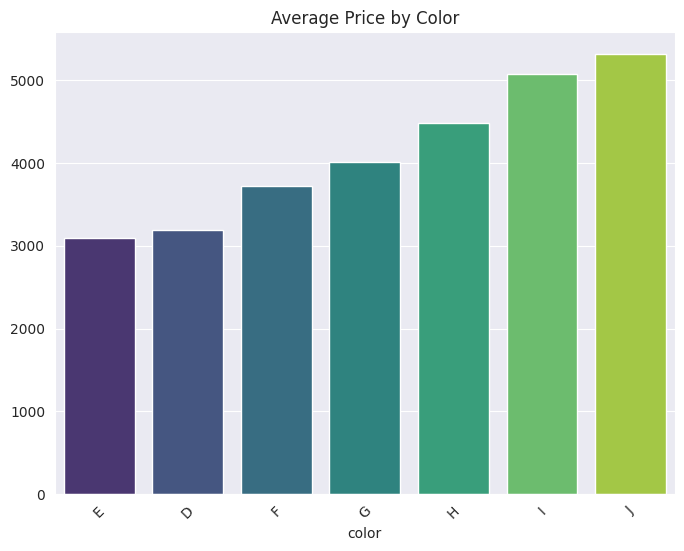

In [ ]:
# plot barplot

# products
products = ['E', 'D', 'F', 'G', 'H', 'I', 'J']

plt.figure(figsize=(8,6))
sns.barplot(x=products, y=train.groupby('color')['price'].mean().sort_values().to_list(), palette='viridis')
plt.title('Average Price by Color')
plt.xlabel('color')
plt.xticks(rotation=45)

In [ ]:
# see the average ratings by product
train.groupby('clarity')['price'].mean().sort_values()

clarity
VVS1    2526.366541
IF      2837.396226
VVS2    3290.851970
VS1     3832.050917
VS2     3927.668938
I1      3946.548223
SI1     3984.658966
SI2     5097.949175
Name: price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'VVS1'),
  Text(1, 0, 'IF'),
  Text(2, 0, 'VVS2'),
  Text(3, 0, 'VS1'),
  Text(4, 0, 'VS2'),
  Text(5, 0, 'I1'),
  Text(6, 0, 'SI1'),
  Text(7, 0, 'SI2')])

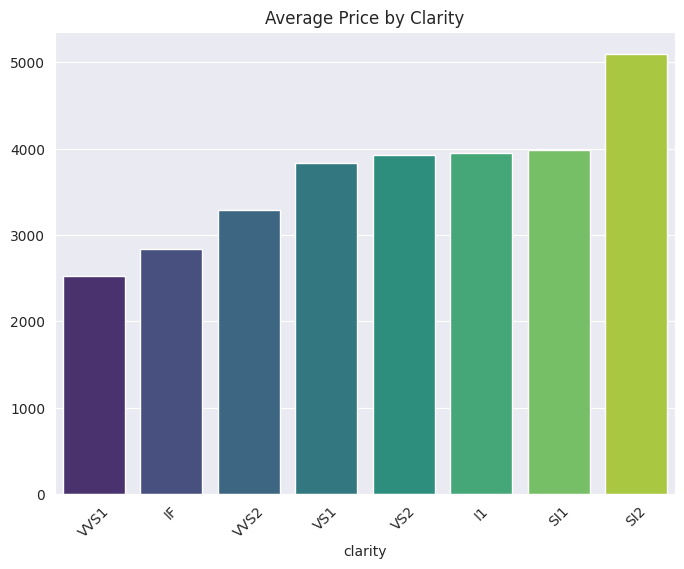

In [ ]:
# plot barplot

# products
products = ['VVS1', 'IF', 'VVS2', 'VS1', 'VS2', 'I1', 'SI1', 'SI2']

plt.figure(figsize=(8,6))
sns.barplot(x=products, y=train.groupby('clarity')['price'].mean().sort_values().to_list(), palette='viridis')
plt.title('Average Price by Clarity')
plt.xlabel('clarity')
plt.xticks(rotation=45)

## Machine Learning

In [ ]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# Declare X and y

y = train[TARGET]
X = train.drop(TARGET, axis=1)

# Split train dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.21, random_state=101)

In [ ]:
# instantiate our one hot encoder

encoder = OneHotEncoder(drop='first', sparse=False)

# split numerical and categorical data and store target in a variable
# train
X_train_num = X_train.select_dtypes(exclude='object')
X_train_cat = X_train.select_dtypes(include='object')
# val
X_val_num = X_val.select_dtypes(exclude='object')
X_val_cat = X_val.select_dtypes(include='object')

# encode
X_train_cat.columns
encoded_X_train_cat = pd.DataFrame(data = encoder.fit_transform(X_train_cat), columns=list(encoder.get_feature_names_out(X_train_cat.columns)), index=X_train_cat.index)
encoded_X_val_cat = pd.DataFrame(data = encoder.fit_transform(X_val_cat), columns=list(encoder.get_feature_names_out(X_val_cat.columns)), index=X_val_cat.index)

# # concat the features back together
X_train_full = pd.concat([X_train_num, encoded_X_train_cat], axis=1)
X_val_full = pd.concat([X_val_num, encoded_X_val_cat], axis=1)

In [ ]:
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# model = Ridge()
# model = ElasticNet()
# model = Lasso()

model.fit(X_train_full, y_train) # process of training a model is called 'fitting'

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_train_full).round(1) # predicting
# use metric to calculate error

print(f'Mean Squared Error of {model} is {np.sqrt(mean_squared_error(y_train, y_pred))}')

Mean Squared Error of RandomForestRegressor() is 242.12786895786704
